# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Gevin Faza Qinthara
- Email: gevinfaza95@gmail.com
- Id Dicoding: gevinfaza1702

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

### Menyiapkan data yang akan diguankan

In [2]:
# Load Dataset
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
df = pd.read_csv(url, delimiter=';')

# Lihat sekilas data
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [3]:
# Ukuran dataset
df.shape

# Info data
df.info()

# Statistik deskriptif
df.describe(include='all')

# Cek nilai unik di tiap kolom
for col in df.columns:
    print(f'{col} - {df[col].nunique()} nilai unik')

# Cek missing value
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [8]:
df.select_dtypes(include='object').columns
# Membuat label dropout
df['dropout'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)


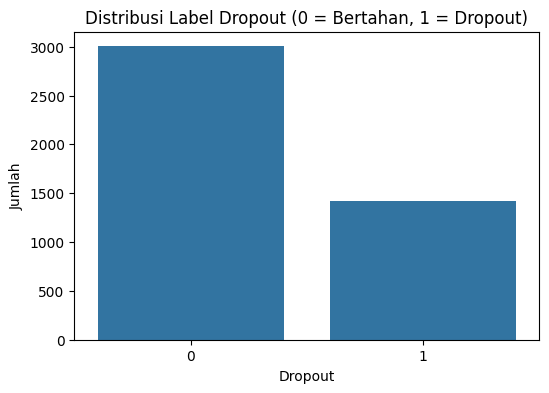

In [9]:
#Distribusi Label Dropout
plt.figure(figsize=(6, 4))
sns.countplot(x='dropout', data=df)
plt.title('Distribusi Label Dropout (0 = Bertahan, 1 = Dropout)')
plt.xlabel('Dropout')
plt.ylabel('Jumlah')
plt.show()


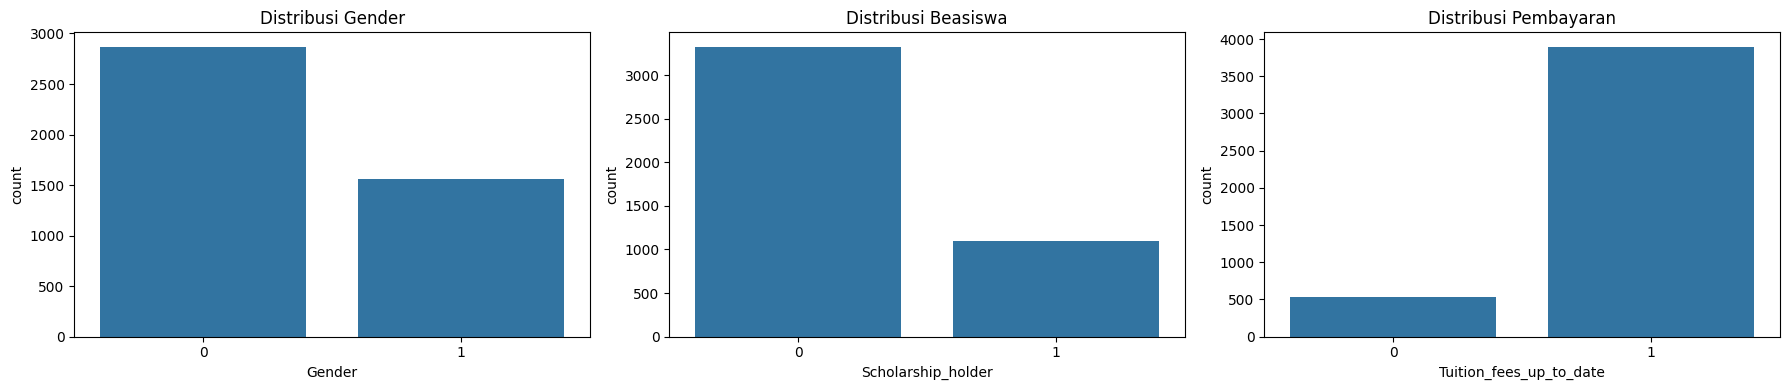

In [24]:
#Distribusi Fitur Kategorikal
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.countplot(ax=axes[0], x='Gender', data=df)
axes[0].set_title('Distribusi Gender')

sns.countplot(ax=axes[1], x='Scholarship_holder', data=df)
axes[1].set_title('Distribusi Beasiswa')

sns.countplot(ax=axes[2], x='Tuition_fees_up_to_date', data=df)
axes[2].set_title('Distribusi Pembayaran')

plt.tight_layout()
plt.show()


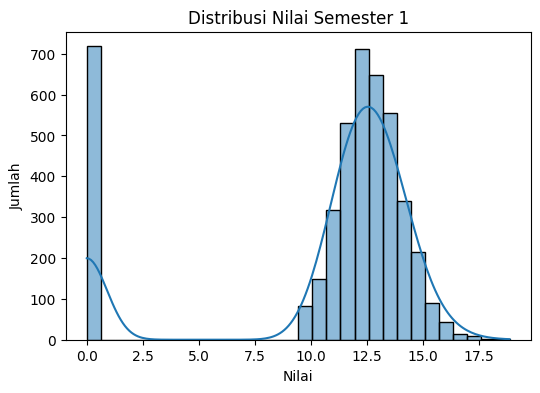

In [11]:
#Distribusi Nilai Semester 1
plt.figure(figsize=(6, 4))
sns.histplot(df['Curricular_units_1st_sem_grade'], bins=30, kde=True)
plt.title('Distribusi Nilai Semester 1')
plt.xlabel('Nilai')
plt.ylabel('Jumlah')
plt.show()


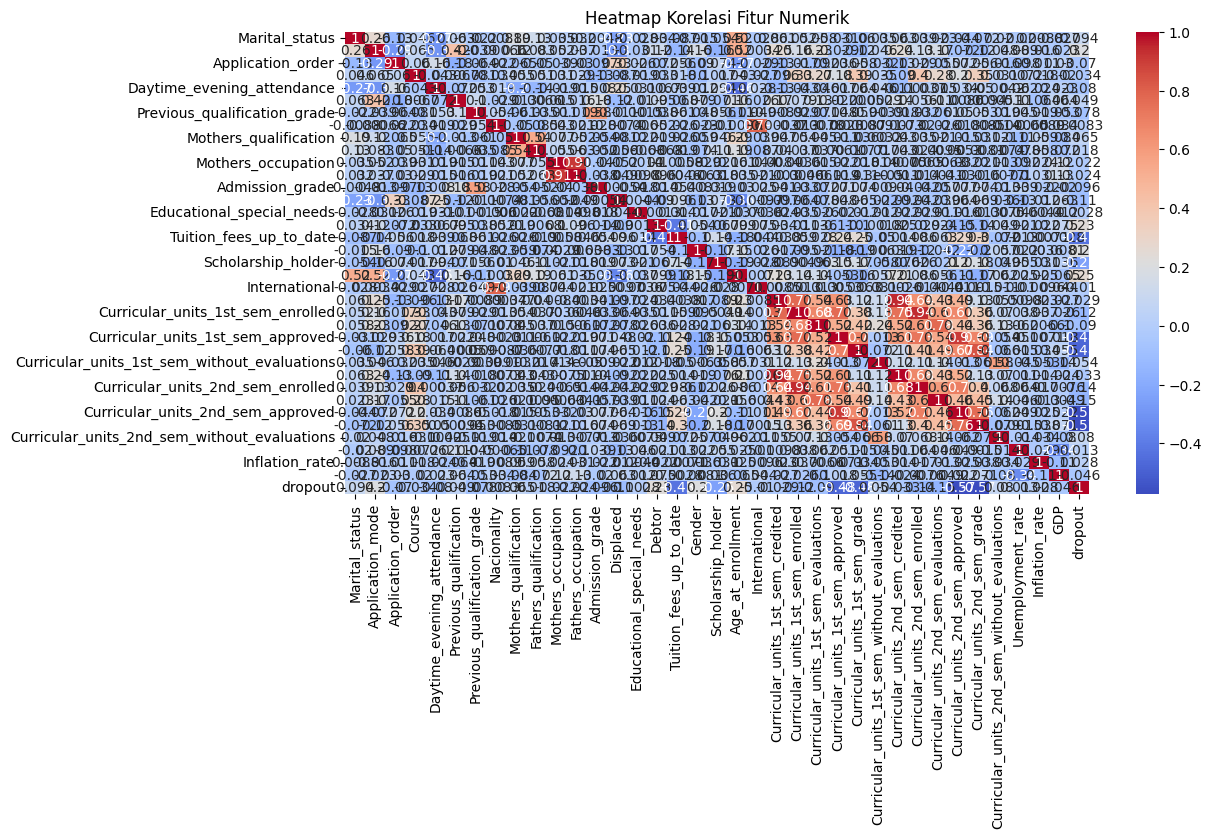

In [12]:
#Korelasi Fitur Numerik
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


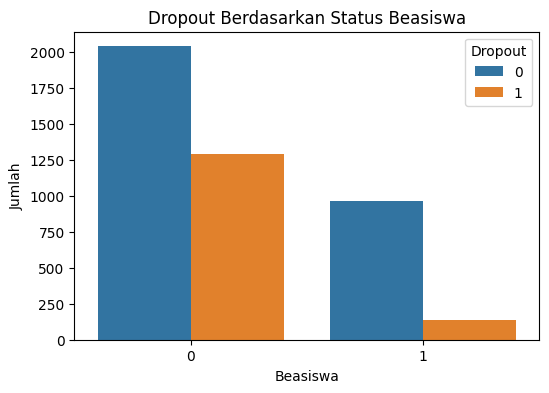

In [13]:
#Dropout Berdasarkan Status Beasiswa
plt.figure(figsize=(6, 4))
sns.countplot(x='Scholarship_holder', hue='dropout', data=df)
plt.title('Dropout Berdasarkan Status Beasiswa')
plt.xlabel('Beasiswa')
plt.ylabel('Jumlah')
plt.legend(title='Dropout')
plt.show()


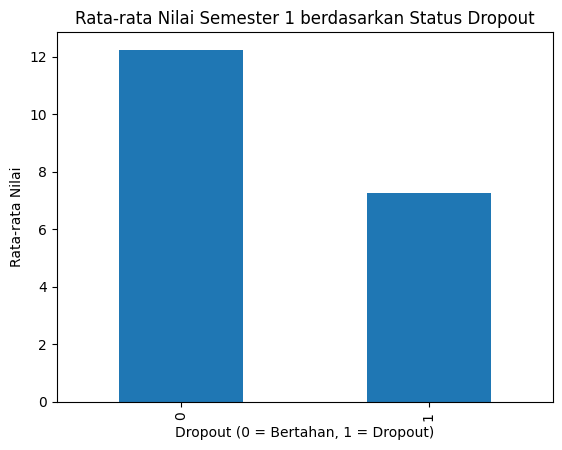

In [14]:
#Rata-rata Nilai Semester 1 Berdasarkan Status Dropout

df.groupby('dropout')['Curricular_units_1st_sem_grade'].mean().plot(kind='bar')
plt.title('Rata-rata Nilai Semester 1 berdasarkan Status Dropout')
plt.ylabel('Rata-rata Nilai')
plt.xlabel('Dropout (0 = Bertahan, 1 = Dropout)')
plt.show()


## Data Preparation / Preprocessing

In [15]:
# Label Encoding kolom kategorikal

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [17]:
#Pisahkan fitur dan target
X = df.drop(columns=['dropout', 'Status'])
y = df['dropout']


In [18]:
#One-hot encoding
X = pd.get_dummies(X, drop_first=True)


In [19]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Modeling

In [20]:
#Latih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluation

In [21]:
#Evaluasi Model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[575  26]
 [ 78 206]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       601
           1       0.89      0.73      0.80       284

    accuracy                           0.88       885
   macro avg       0.88      0.84      0.86       885
weighted avg       0.88      0.88      0.88       885



In [22]:
#Simpan Model
joblib.dump(model, 'model.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')


['feature_columns.pkl']

In [23]:
#Simpan Dataset yang Sudah Dibersihkan
df.to_csv('student_dataset_clean.csv', index=False)
